# FONCTIONS DE BASE

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, ttest_ind


# résolution du système Lorenz63 selon Euler.
def lorenz_euler(sigma, rho, beta, dt=0.001, n_steps=20000, init_cond=None):
    if init_cond is None:
        eta = np.sqrt(beta * (rho - 1))
        x, y, z = eta, eta + 3, rho - 1
    else:
        x, y, z = init_cond

    traj = np.zeros((n_steps, 3))
    traj[0] = [x, y, z]

    for i in range(1, n_steps):

        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        x += dt * dx
        y += dt * dy
        z += dt * dz
        traj[i] = [x, y, z]

    return traj



 # PARTIE I — SOLUTIONS DU SYSTÈME

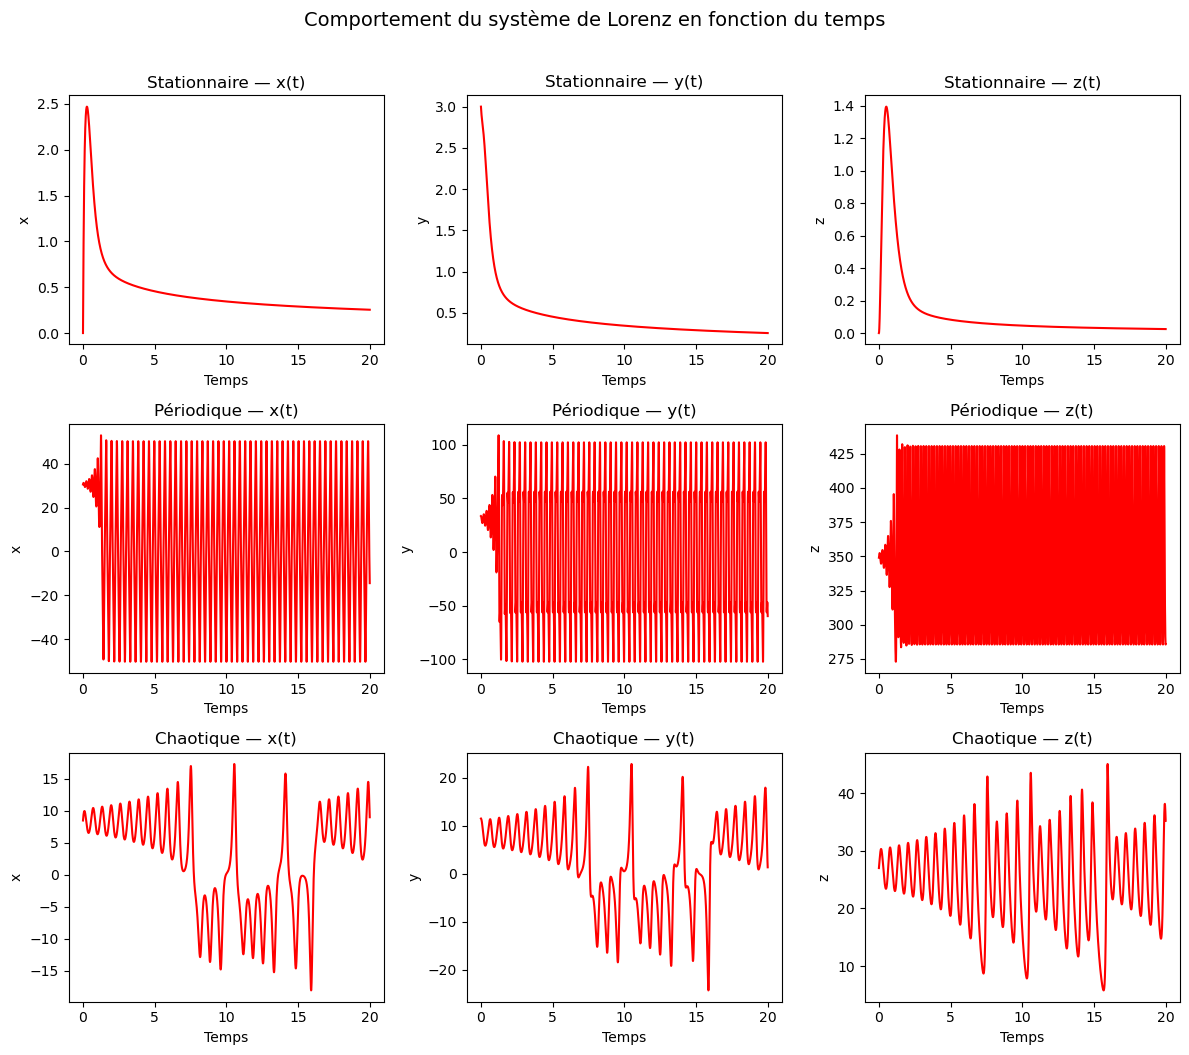

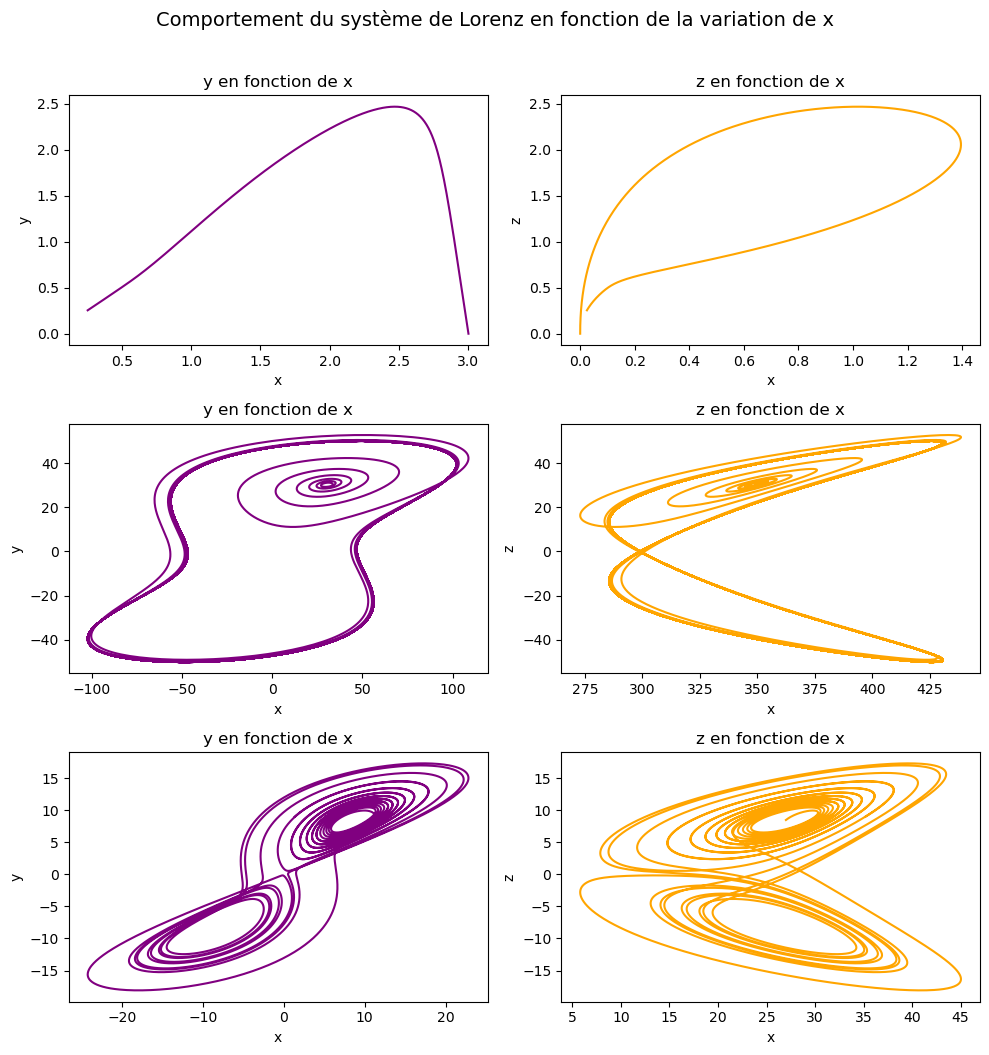

In [23]:
# Solution du système de lorentz pour les solutions stationnaire, périodique et chaotique.
def partie1_solutions():
    dt, N = 0.001, 20000
    params = [
        (10, 1.0, 2.667, "Stationnaire"),
        (10, 350.0, 2.667, "Périodique"),
        (10, 28.0, 2.667, "Chaotique")
    ]

    # Graphique des variables en fonction du temps
    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    t = np.arange(N) * dt

    for j, (sigma, rho, beta, titre) in enumerate(params):
        traj = lorenz_euler(sigma, rho, beta, dt, N)
        x, y, z = traj[:, 0], traj[:, 1], traj[:, 2]

        # x(t)
        axes[j, 0].plot(t, x, 'r')
        axes[j, 0].set_title(f"{titre} — x(t)")
        axes[j, 0].set_xlabel("Temps")
        axes[j, 0].set_ylabel("x")

         # y(t)
        axes[j, 1].plot(t, y, 'r')
        axes[j, 1].set_title(f"{titre} — y(t)")
        axes[j, 1].set_xlabel("Temps")
        axes[j, 1].set_ylabel("y")

         # z(t)
        axes[j, 2].plot(t, z, 'r')
        axes[j, 2].set_title(f"{titre} — z(t)")
        axes[j, 2].set_xlabel("Temps")
        axes[j, 2].set_ylabel("z")

    plt.tight_layout()
    plt.suptitle("Comportement du système de Lorenz en fonction du temps", fontsize=14, y=1.05)
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 1.png", dpi=150, bbox_inches="tight")
    plt.show()

    # Graphique des variables y et z en fonction de la variable x.
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    t = np.arange(N) * dt

    for j, (sigma, rho, beta, titre) in enumerate(params):
        traj = lorenz_euler(sigma, rho, beta, dt, N)
        x, y, z = traj[:, 0], traj[:, 1], traj[:, 2]

        # Espace de phase x-y
        axes[j, 0].plot(y, x, color='purple')
        axes[j, 0].set_title("y en fonction de x")
        axes[j, 0].set_xlabel("x")
        axes[j, 0].set_ylabel("y")

        # Espace de phase x-z
        axes[j, 1].plot(z, x, color='orange')
        axes[j, 1].set_title("z en fonction de x")
        axes[j, 1].set_xlabel("x")
        axes[j, 1].set_ylabel("z")


    plt.tight_layout()
    plt.suptitle("Comportement du système de Lorenz en fonction de la variation de x", fontsize=14, y=1.05)
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 2.png", dpi=150, bbox_inches="tight")
    plt.show()

partie1_solutions()

# PARTIE II — PRÉVISIBILITÉ

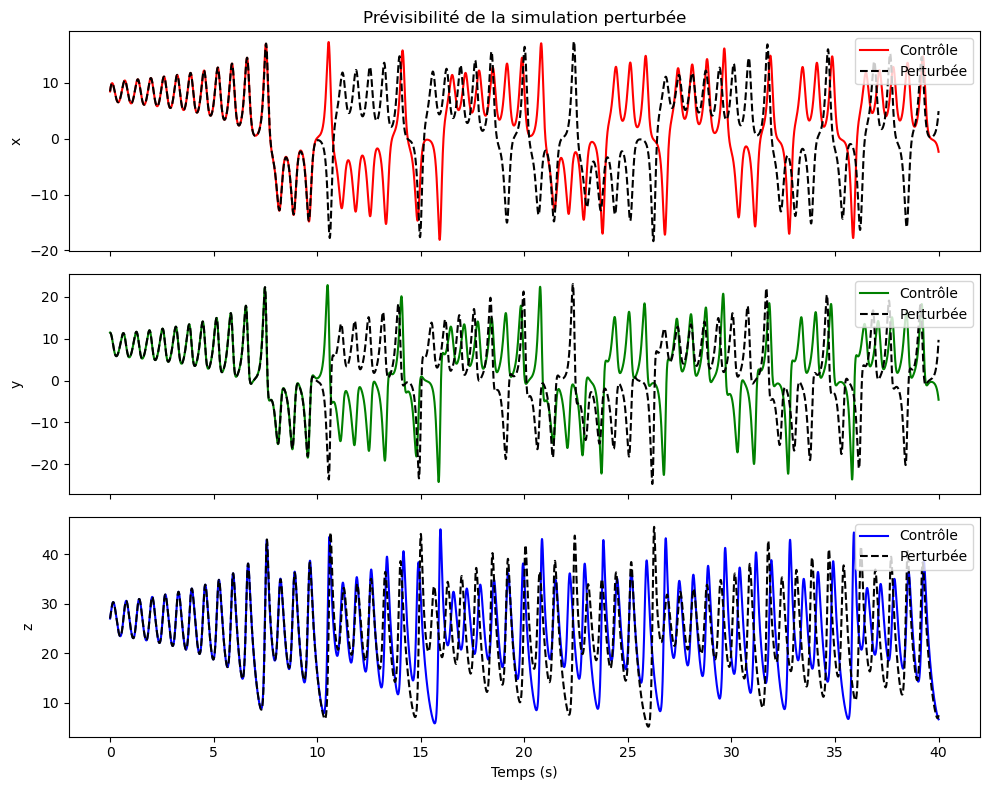

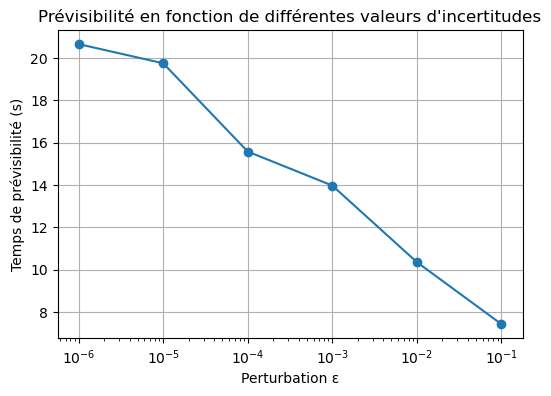

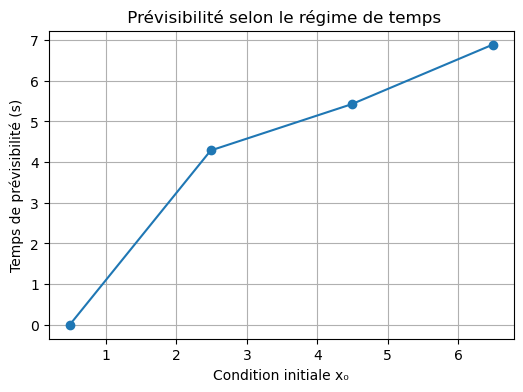

In [15]:
def partie2_previsibilite():
    sigma, rho, beta = 10, 28.0, 2.667
    eta = np.sqrt(beta * (rho - 1))
    dt, N = 0.001, 40000
    t = np.arange(N) * dt

    # 2.1 Prévisibilité moyenne
    eps = 0.01
    traj_ctrl = lorenz_euler(sigma, rho, beta, dt, N)
    traj_pert = lorenz_euler(sigma, rho, beta, dt, N, (eta+eps, eta+3, rho-1))

    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    variables = ["x", "y", "z"]
    colors = ["r", "g", "b"]

    for i in range(3):
        axs[i].plot(t, traj_ctrl[:, i], color=colors[i], label="Contrôle")
        axs[i].plot(t, traj_pert[:, i], "k--", label="Perturbée")
        axs[i].set_ylabel(variables[i])
        axs[i].legend(loc="upper right")

    axs[0].set_title("Prévisibilité de la simulation perturbée")
    axs[-1].set_xlabel("Temps (s)")
    plt.tight_layout()
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 3.png", dpi=150, bbox_inches="tight")
    plt.show()

    # 2.2 Prévisibilité selon l’incertitude observationnelle
    epsilons = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    pred_times = []

    for eps in epsilons:
        ctrl = lorenz_euler(sigma, rho, beta, dt, N)
        pert = lorenz_euler(sigma, rho, beta, dt, N, (eta+eps, eta+3, rho-1))
        diff = np.abs(ctrl[:, 0] - pert[:, 0])
        t_pred = t[np.argmax(diff > np.std(ctrl[:, 0]))]
        pred_times.append(t_pred)

    plt.figure(figsize=(6, 4))
    plt.semilogx(epsilons, pred_times, "o-")
    plt.xlabel("Perturbation ε")
    plt.ylabel("Temps de prévisibilité (s)")
    plt.title("Prévisibilité en fonction de différentes valeurs d'incertitudes")
    plt.grid(True)
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 4.png", dpi=150, bbox_inches="tight")
    plt.show()

    # 2.3 Prévisibilité selon le régime de temps
    x_y_inits = [[eta-2,eta+1],[ eta-4,eta-1],[eta-6,eta-3], [eta-8,eta-5]]
    eps = 0.01
    pred_times_reg = []

    for (x0,y0) in x_y_inits :
        ctrl = lorenz_euler(sigma, rho, beta, dt, N)
        pert = lorenz_euler(sigma, rho, beta, dt, N, (x0+eps, y0, rho-1))
        diff = np.abs(ctrl[:, 0] - pert[:, 0])
        t_pred = t[np.argmax(diff > np.std(ctrl[:, 0]))]
        pred_times_reg.append(t_pred)

    plt.figure(figsize=(6, 4))
    plt.plot([x[0] for x in x_y_inits], pred_times_reg, "o-")
    plt.xlabel("Condition initiale x₀")
    plt.ylabel("Temps de prévisibilité (s)")
    plt.title(" Prévisibilité selon le régime de temps")
    plt.grid(True)
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 5.png", dpi=150, bbox_inches="tight")
    plt.show()


partie2_previsibilite()


# PARTIE III — CLIMAT DU SYSTÈME CHAOTIQUE

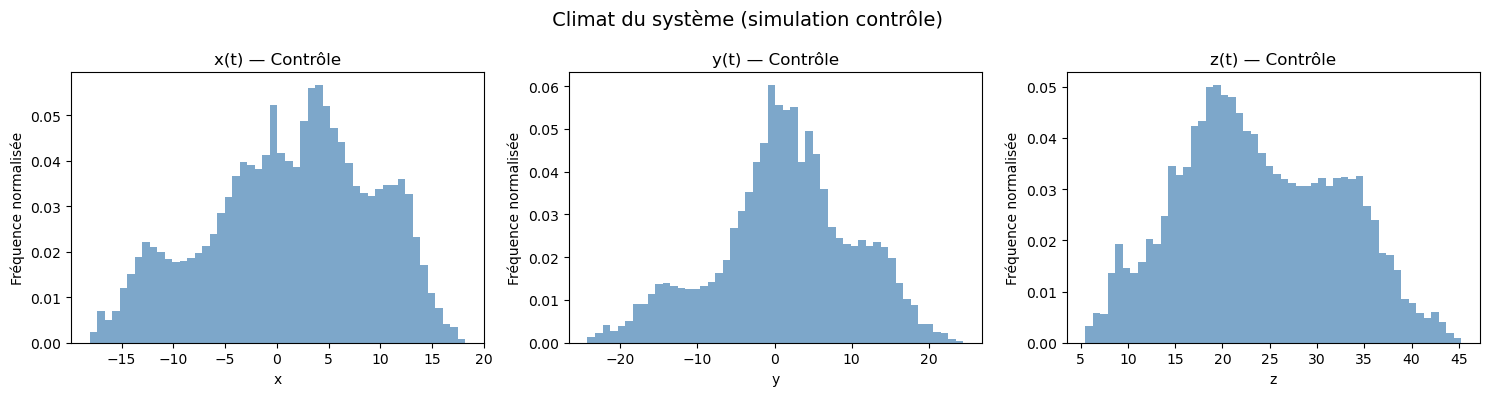

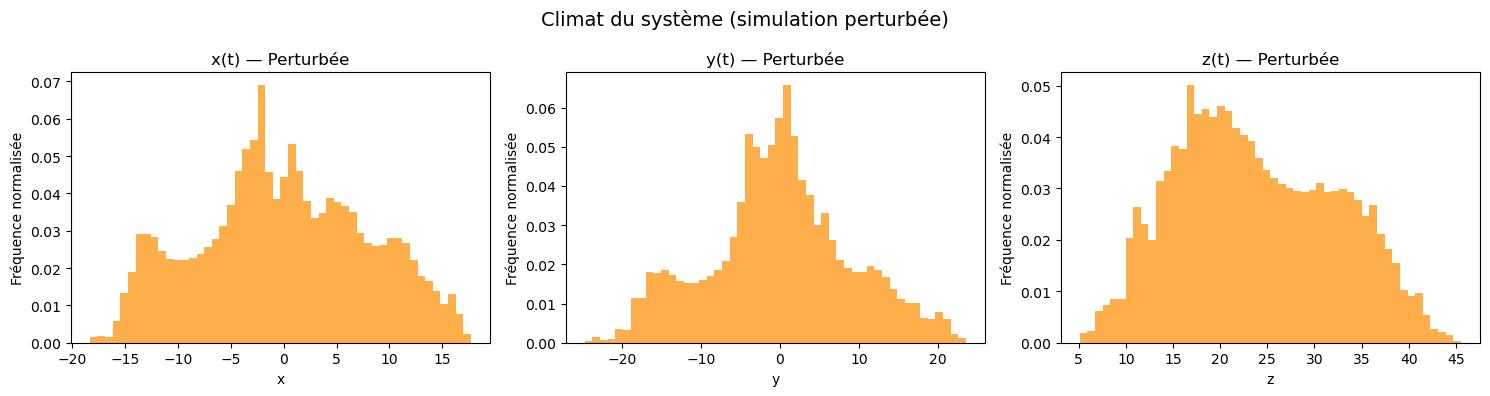


 Test statistique entre les deux climats  

Variable x:
 Test KS : p = 0.0000e+00  (stat = 0.116)

Variable y:
 Test KS : p = 0.0000e+00  (stat = 0.106)

Variable z:
 Test KS : p = 4.7322e-32  (stat = 0.027)



In [30]:
def partie3_climat():
    sigma, rho, beta = 10, 28.0, 2.667
    eta = np.sqrt(beta * (rho - 1))
    eps, dt, N = 0.01, 0.001, 100000


    ctrl = lorenz_euler(sigma, rho, beta, dt, N)
    pert = lorenz_euler(sigma, rho, beta, dt, N, (eta + eps, eta + 3, rho - 1))
    variables = ["x", "y", "z"]

    # Simulation contrôle
    fig1, axs1 = plt.subplots(1, 3, figsize=(15, 4))
    for i, var in enumerate(variables):
        axs1[i].hist(ctrl[:, i], bins=50, color="steelblue", alpha=0.7, density=True)
        axs1[i].set_title(f"{var}(t) — Contrôle")
        axs1[i].set_xlabel(var)
        axs1[i].set_ylabel("Fréquence normalisée")
    plt.suptitle(" Climat du système (simulation contrôle)", fontsize=14)
    plt.tight_layout()
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 6.png", dpi=150, bbox_inches="tight")
    plt.show()

    # Simulation perturbée
    fig2, axs2 = plt.subplots(1, 3, figsize=(15, 4))
    for i, var in enumerate(variables):
        axs2[i].hist(pert[:, i], bins=50, color="darkorange", alpha=0.7, density=True)
        axs2[i].set_title(f"{var}(t) — Perturbée")
        axs2[i].set_xlabel(var)
        axs2[i].set_ylabel("Fréquence normalisée")
    plt.suptitle("Climat du système (simulation perturbée)", fontsize=14)
    plt.tight_layout()
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 7.png", dpi=150, bbox_inches="tight")
    plt.show()

    # 3.2 Tests statistiques

    print("\n Test statistique entre les deux climats  \n")
    for i, var in enumerate(variables):

        min_len = min(len(ctrl[:, i]), len(pert[:, i]))
        x1 = ctrl[:min_len, i]
        x2 = pert[:min_len, i]

        ks_stat, ks_p = ks_2samp(x1, x2)

        print(f"Variable {var}:")
        print(f" Test KS : p = {ks_p:.4e}  (stat = {ks_stat:.3f})")
        print("")

partie3_climat()

# figure bonus

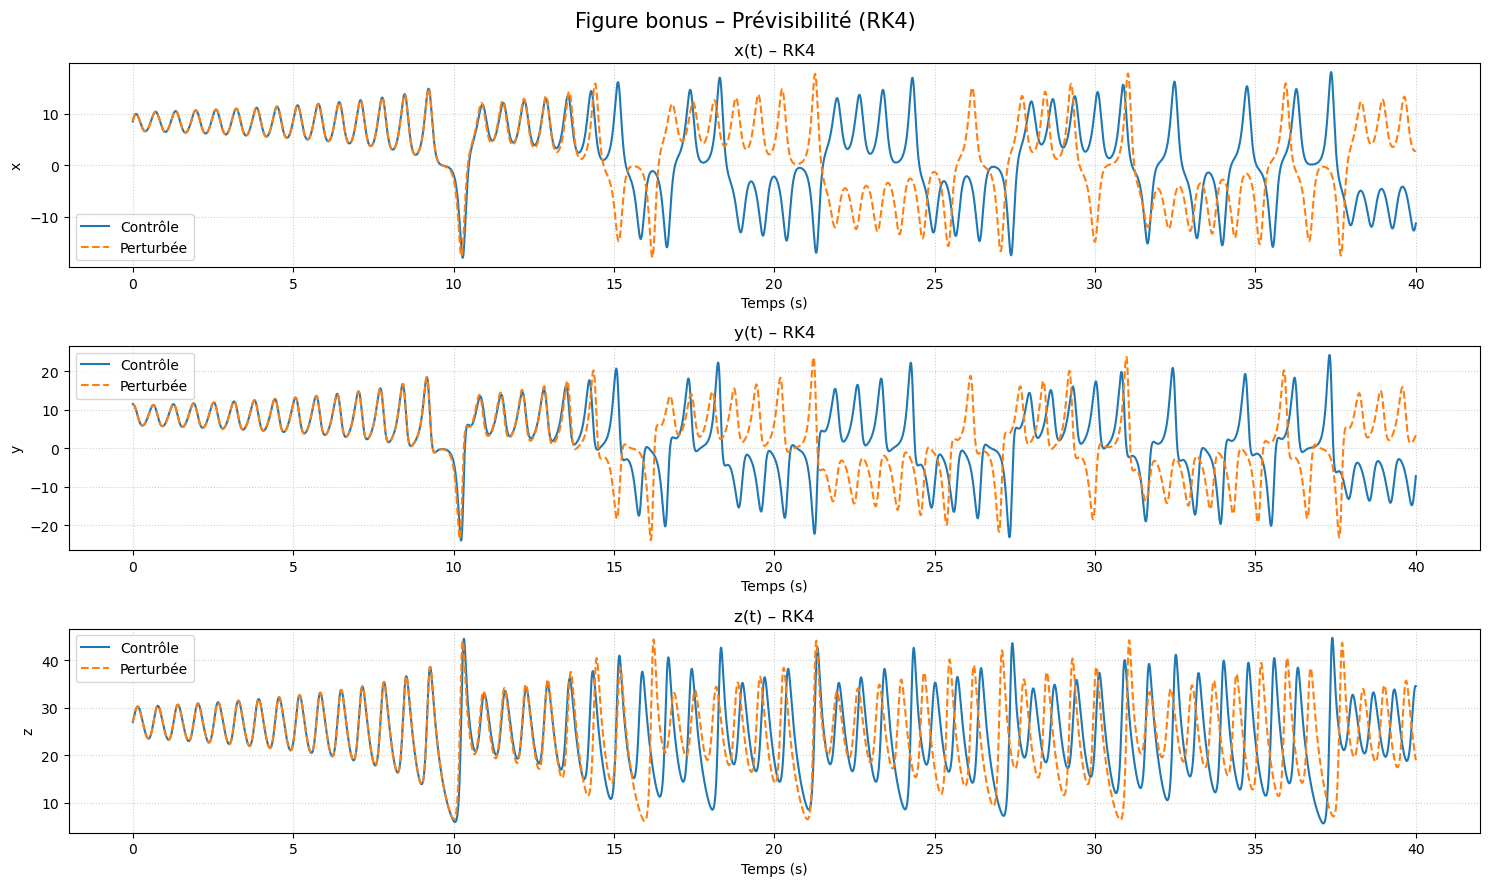

In [17]:
def lorenz_rhs(state, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

def lorenz_rk4(sigma, rho, beta, dt=0.001, n_steps=20000, init_cond=None):
    if init_cond is None:
        eta = np.sqrt(beta * (rho - 1))
        x0, y0, z0 = eta, eta + 3, rho - 1
    else:
        x0, y0, z0 = init_cond

    traj = np.zeros((n_steps, 3))
    state = np.array([x0, y0, z0])
    traj[0] = state

    for i in range(1, n_steps):
        k1 = lorenz_rhs(state, sigma, rho, beta)
        k2 = lorenz_rhs(state + 0.5 * dt * k1, sigma, rho, beta)
        k3 = lorenz_rhs(state + 0.5 * dt * k2, sigma, rho, beta)
        k4 = lorenz_rhs(state + dt * k3, sigma, rho, beta)
        state = state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
        traj[i] = state

    return traj

def partie2_previsibilite():
    sigma, rho, beta = 10, 28.0, 2.667
    dt, N = 0.001, 40000
    t = np.arange(N) * dt
    eta = np.sqrt(beta * (rho - 1))
    eps = 0.01

    # contrôle et perturbée avec RK4
    traj_ctrl = lorenz_rk4(sigma, rho, beta, dt, N, (eta, eta+3, rho-1))
    traj_pert = lorenz_rk4(sigma, rho, beta, dt, N, (eta+eps, eta+3, rho-1))

    vars = ['x', 'y', 'z']

        # --- Une seule figure avec 3 sous-graphiques verticaux ---
    fig, axs = plt.subplots(3, 1, figsize=(15, 9))

    for i, var in enumerate(vars):
        axs[i].plot(t, traj_ctrl[:, i], label='Contrôle')
        axs[i].plot(t, traj_pert[:, i], linestyle='--', label='Perturbée')
        axs[i].set_title(f"{var}(t) – RK4")
        axs[i].set_xlabel("Temps (s)")
        axs[i].set_ylabel(var)
        axs[i].legend()
        axs[i].grid(True, linestyle=':', alpha=0.6)

    plt.suptitle("Figure bonus – Prévisibilité (RK4)", fontsize=15)
    plt.tight_layout()

    # Sauvegarde et affichage de la figure complète
    plt.savefig("C:/Users/samue/OneDrive/Bureau/Université/3e année/5e session (automne 2025)/Laboratoire 3/Expérience 2/Figure 8.png",dpi=150,bbox_inches="tight")
    plt.show()



partie2_previsibilite()

